Visualizing annotations for 040357.jpg
Image shape: (480, 640, 3)


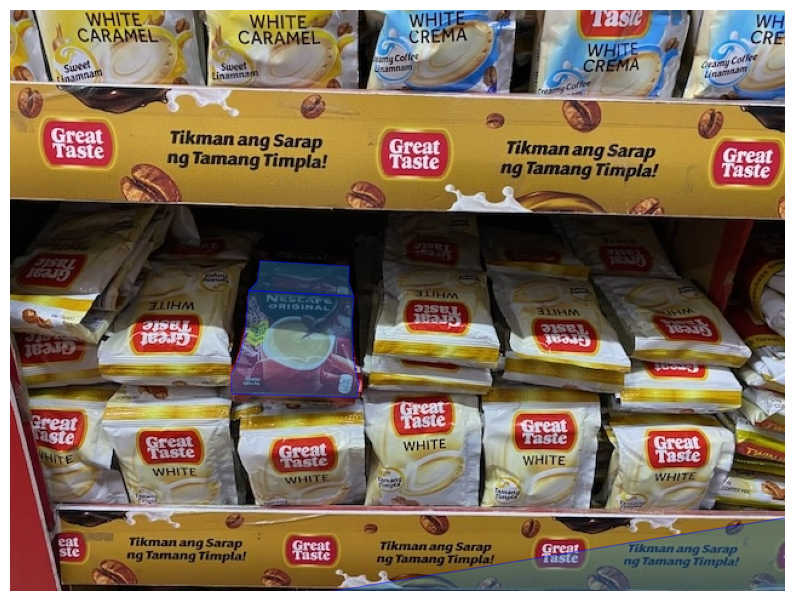

Visualizing annotations for 090382.jpg
Image shape: (3264, 2448, 3)


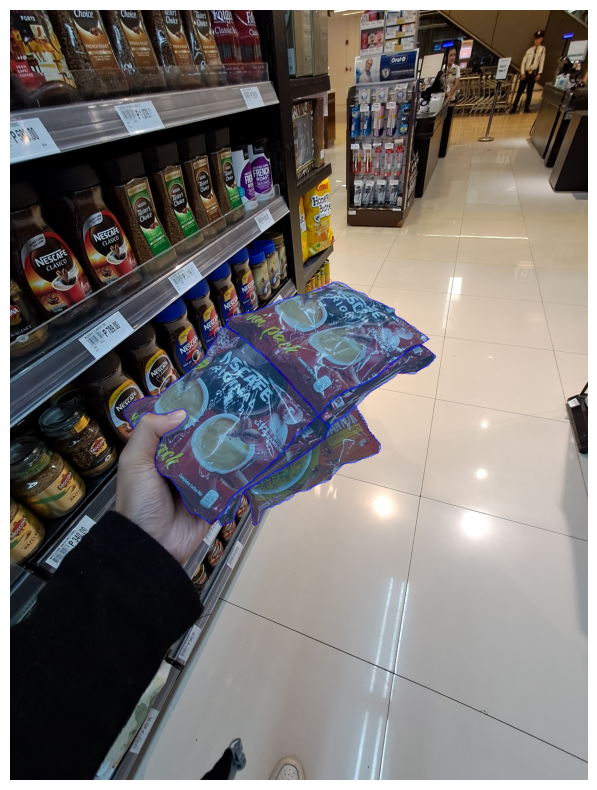

Visualizing annotations for 250002.jpg
Image shape: (480, 640, 3)


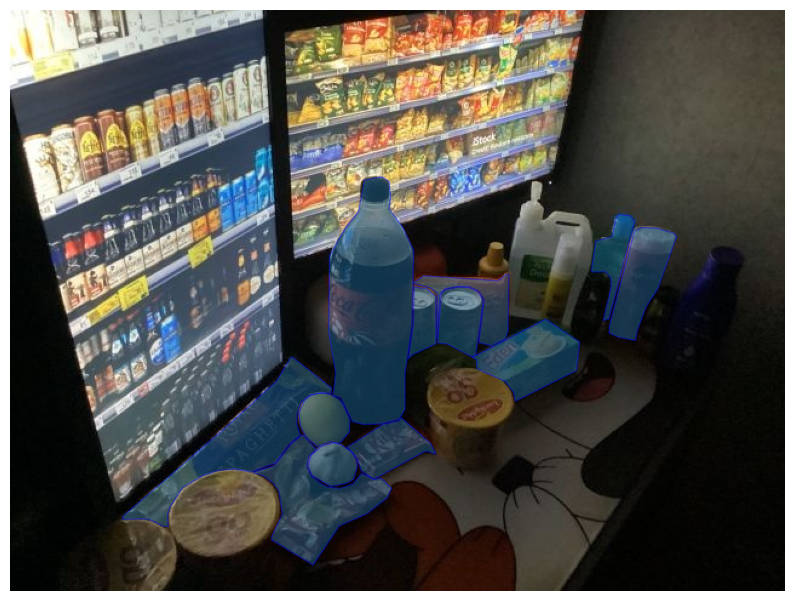

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the path to the images and labels directories
images_dir = "/data/students/mary/mlops-exercises/ME6/dataset__all/train/images"
labels_dir = "/data/students/mary/mlops-exercises/ME6/dataset__all/train/labels"

# Function to visualize annotations
def visualize_annotations(image_path, label_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    print(f"Image shape: {image.shape}")
    # Read the label file
    with open(label_path, 'r') as file:
        lines = file.readlines()
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Draw the bounding boxes and segmentation masks
    for line in lines:
        parts = line.strip().split()
        if len(parts) > 0:
            # Convert parts to float
            values = [float(part) for part in parts]
            class_id = int(values[0])
            #bbox = values[1:5]
            segmentation = values[1:]
            
            # Draw bounding box
            
            # x_center, y_center, width, height = bbox
            # x_center *= image.shape[1]
            # y_center *= image.shape[0]
            # width *= image.shape[1]
            # height *= image.shape[0]
            # x_min = int(x_center - width / 2)
            # y_min = int(y_center - height / 2)
            # x_max = int(x_center + width / 2)
            # y_max = int(y_center + height / 2)
            # rect = plt.Rectangle((x_min, y_min), width, height, fill=False, edgecolor='red', linewidth=2)
            # plt.gca().add_patch(rect)
            
            # Add class label
            # plt.text(x_min, y_min - 10, f'Class: {class_id}', color='red', fontsize=12, backgroundcolor='white')

            # Draw segmentation mask if available
            if segmentation:
                segmentation = [(segmentation[i], segmentation[i + 1]) for i in range(0, len(segmentation), 2)]
                segmentation = [(x * image.shape[1], y * image.shape[0]) for x, y in segmentation]
                polygon = plt.Polygon(segmentation, fill=True, edgecolor='blue', alpha=0.4)
                plt.gca().add_patch(polygon)
    
    plt.axis('off')
    plt.show()

# List of corrupted files to visualize
corrupted_files = [
    #"090051.jpg",
    #"090352.jpg",
    "040357.jpg",
    "090382.jpg", 
    "250002.jpg"
]
# Visualize the annotations of the corrupted files
for filename in corrupted_files:
    image_path = os.path.join(images_dir, filename)
    label_path = os.path.join(labels_dir, filename.replace(".jpg", ".txt"))
    if os.path.exists(image_path) and os.path.exists(label_path):
        print(f"Visualizing annotations for {filename}")
        visualize_annotations(image_path, label_path)
    else:
        print(f"File {filename} or its label does not exist.")